<a href="https://colab.research.google.com/github/samuelajala01/CNN_classifier/blob/main/CNN_object_%20classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [76]:
# LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#NORMALIZE PIXEL VALUES TO BE BETWEEN 0 AND 1
train_images, test_images = train_images/255.0, test_images/255.0

class_names = ['airlane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

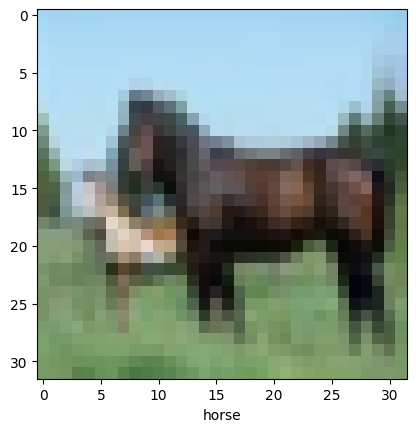

In [77]:
# LET'S LOOK AT ONE IMAGE

IMG_INDEX = 12

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

### CNN architecture

In [89]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


In [90]:

model = models.Sequential()
# model.add(data_augmentation)
model.add(layers.Conv2D(32, (3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

In [91]:
model.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

## ADDING DENSE LAYERS

In [92]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

In [82]:
model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_27 (Sequential)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [93]:
## TRAINING THE MODEL
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.3816 - loss: 1.6904 - val_accuracy: 0.5928 - val_loss: 1.1325
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.6186 - loss: 1.0735 - val_accuracy: 0.6642 - val_loss: 0.9537
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.6906 - loss: 0.8796 - val_accuracy: 0.6929 - val_loss: 0.8850
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 50ms/step - accuracy: 0.7298 - loss: 0.7677 - val_accuracy: 0.6983 - val_loss: 0.8814
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 47ms/step - accuracy: 0.7631 - loss: 0.6802 - val_accuracy: 0.7152 - val_loss: 0.8427
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.7873 - loss: 0.6054 - val_accuracy: 0.7157 - val_loss: 0.8419
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.8104 - loss: 0.5373 - val_accuracy: 0.7215 - val_loss: 0.8541
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.8272 -

## Evaluating the Model

In [94]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 5s - 16ms/step - accuracy: 0.7157 - loss: 0.8419
0.7156999707221985


In [ ]:

from google.colab import files
from PIL import Image
import numpy as np


def predict_uploaded_image(file_path):
    # Load and preprocess the uploaded image
    image = Image.open(file_path)
    input_shape = model.input_shape[1:3]
    resized_image = image.resize(input_shape)
    image_array = np.array(resized_image)
    normalized_image_array = image_array / 255.0
    input_image = np.expand_dims(normalized_image_array, axis=0)


    prediction = model.predict(input_image)

    predicted_classes = np.argmax(prediction, axis=1)

    return predicted_classes

uploaded = files.upload()

file_path = next(iter(uploaded))

predicted_classes = predict_uploaded_image(file_path)

# Print the predicted classes
for predicted_class in predicted_classes:
    print(f'Predicted class: {class_names[predicted_class]}')